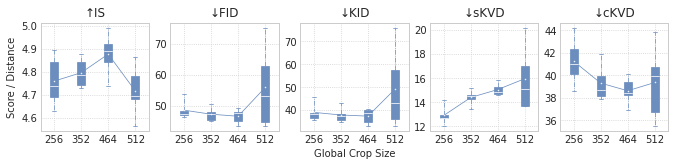

In [1]:

import matplotlib.pyplot as plt
import numpy as np

global_crop_sizes = ["256", "352", "464", "512"]
results = {
    "↑IS": {
        "256": [4.89657205107159000, 4.84123550879779000, 4.62846346171431000, 4.69106154576456000, 4.73704770498272000],
        "352": [4.87506516344428000, 4.72934665936236000, 4.84336816232881000, 4.74257126896230000, 4.78724454930635000],
        "464": [4.99252125546357000, 4.92130960389982000, 4.84336816232881000, 4.73788095112620000, 4.88815783447966000],
        "512": [4.69476289336545000, 4.56161397169969000, 4.77905647219250000, 4.86307129972758000, 4.68183373027133000]
    },
    "↓FID": {
        "256": [47.0144183997206000, 47.4110000195458000, 48.4230476349107000, 46.2655982821252000, 53.7278486641262000],
        "352": [50.6935238852710000, 47.9346907584892000, 44.9503454317961000, 45.4567828354866000, 47.2572560139644000],
        "464": [47.6337314817387000, 47.9131017483588000, 44.9503454317961000, 43.3589115807441000, 49.1753922563488000],
        "512": [62.6674241960997000, 44.8883642755867000, 53.2726388885218000, 75.2243125747072000, 43.3416680628712000]
    },
    "↓KID": {
        "256": [0.03819760716716710, 0.03656403488238230, 0.03855934543543540, 0.03541866303803800, 0.04570726850600600],
        "352": [0.04304228633633630, 0.03819931617117110, 0.03451378611611600, 0.03548395529279280, 0.03749182612612610],
        "464": [0.03870023260510500, 0.03986180929679680, 0.03451378611611600, 0.03276770460460450, 0.04041995068568560],
        "512": [0.05756376550800800, 0.03585541899399390, 0.04320675680180180, 0.07605408417667660, 0.03292757865365360]
    },
    "↓sKVD": {
        "256": [0.01269292831420890, 0.01267385482788080, 0.01288771629333490, 0.01198434829711910, 0.01420402526855460],
        "352": [0.01338553428649900, 0.01428079605102530, 0.01459765434265130, 0.01450777053833000, 0.01514863967895500],
        "464": [0.01583075523376460, 0.01469874382019040, 0.01525187492370600, 0.01459264755249020, 0.01483750343322750],
        "512": [0.01699995994567870, 0.01371002197265620, 0.01512217521667480, 0.02018594741821280, 0.01370573043823240]
    },
    "↓cKVD": {
        "256": [0.04099545478820800, 0.03861730098724360, 0.04232518672943110, 0.04008712768554680, 0.04425954818725580],
        "352": [0.03992826938629150, 0.03864779472351070, 0.04188714027404780, 0.03790709972381590, 0.03814024925231930],
        "464": [0.03936269283294670, 0.03693242073059080, 0.04013807773590080, 0.03824427127838130, 0.03840215206146240],
        "512": [0.03996539115905760, 0.03544113636016840, 0.04382641315460200, 0.03676595687866210, 0.04077405929565420]
    }
}

def to_listoflists(dict, metric):
    out = []
    for k in dict.keys():
        l = np.array(dict[k])*1000 if metric in ["↓KID", "↓sKVD", "↓cKVD"] else np.array(dict[k])
        out.append(l)
    return out

with plt.style.context('seaborn-whitegrid'):
    nr_keys = len(results.keys())
    fig, axs = plt.subplots(1, nr_keys, figsize=(2.25*nr_keys, 2))
    c = "#6C8EBF"
    for ax, metric in zip(axs, results.keys()):
        bp = ax.boxplot(to_listoflists(results[metric], metric), positions=[1, 2, 3, 4], showmeans=True, showfliers=True, whis=30.0,
                   widths=0.3, patch_artist=True,
                    boxprops=dict(facecolor=c, color=c, linewidth=0.75),
                    capprops=dict(color=c, linewidth=0.75),
                    whiskerprops=dict(color=c, linestyle='-.', linewidth=0.75),
                    flierprops=dict(color=c, markeredgecolor=c),
                    medianprops=dict(color="white", linewidth=0.75),
                    meanprops=dict(marker=".", markerfacecolor="white", markeredgecolor="white", markersize=1))
        ax.plot([1, 2, 3, 4], np.mean(to_listoflists(results[metric], metric), axis=1), color=c, linewidth=0.75, linestyle='-')
        ax.set_xticklabels(global_crop_sizes)
        ax.set_title(metric)
        ax.grid(True, linestyle=':')

    axs[0].set_ylabel("Score / Distance")
    axs[2].set_xlabel("Global Crop Size")
    plt.subplots_adjust(wspace=0.2)
    fig.savefig('cropSizeAblation.pdf', bbox_inches="tight")